# Data Analysis on Crimes in Chicago

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df  = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

Dataset contains crimes indicents occured in Chicago between 2012 to January 2017. Data is downloaded from kaggle.com

In [3]:
df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
df.columns

Index([u'Unnamed: 0', u'ID', u'Case Number', u'Date', u'Block', u'IUCR',
       u'Primary Type', u'Description', u'Location Description', u'Arrest',
       u'Domestic', u'Beat', u'District', u'Ward', u'Community Area',
       u'FBI Code', u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On',
       u'Latitude', u'Longitude', u'Location'],
      dtype='object')

The total number of crime incidences in the dataset:

In [5]:
len(df)

1456714

# Data content

One row indicates one crime incident in the city

The description of a few columns which will be used in the analysis is described below.

ID - Unique identifier for the record.

Date - Date when the incident occurred. this is sometimes a best estimate.

Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

Primary Type - The primary description of the IUCR code.

Location Description - Description of the location where the incident occurred.

Arrest - Indicates whether an arrest was made.

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. 

District - Indicates the police district where the incident occurred.

Year - Year the incident occurred.

# Cleaning

Making extra copies of original dataset

In [6]:
df4=df.copy()

In [7]:
df3=df.copy()

Dropping tables which will not be important in the data analysis part

In [8]:
df.drop(['Unnamed: 0','X Coordinate','Y Coordinate','Community Area','Case Number','Description','Updated On','Ward','Latitude','Longitude','Location','FBI Code','IUCR'],axis=1,inplace=True)

Checking and removing null values from the table

In [9]:
df.isnull().sum()

ID                         0
Date                       0
Block                      0
Primary Type               0
Location Description    1658
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Year                       0
dtype: int64

In [10]:
df=df.dropna(subset=['Location Description','District'], how='any')

In [11]:
df.dtypes

ID                        int64
Date                     object
Block                    object
Primary Type             object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Year                      int64
dtype: object

Converting in boolean values in columns Arrest and Domestic to 1 and 0

In [12]:
df['Arrest'] = (df['Arrest']).astype(int)

In [13]:
df['Domestic'] = (df['Domestic']).astype(int)

In [14]:
df.head()

,ID,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Year
0,10508693,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,APARTMENT,1,1,1022,10.0,2016
1,10508695,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,RESIDENCE,0,1,313,3.0,2016
2,10508697,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,STREET,0,0,1524,15.0,2016
3,10508698,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIDEWALK,0,0,1532,15.0,2016
4,10508699,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,RESIDENCE,0,1,1523,15.0,2016


Using 'to_datetime' to convert the Date column in 'Timestamp' format to extract day,month,hour


In [15]:
df['DateTime']=pd.to_datetime(df['Date'])

In [16]:
def gethour(dtm):
        return dtm.hour

In [17]:
df['hour']=df['DateTime'].apply(gethour)

In [18]:
def getmonth(dtm):
        return dtm.month

In [19]:
df['Month']=df['DateTime'].apply(getmonth)

In [20]:
df.head()

,ID,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Year,DateTime,hour,Month
0,10508693,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,APARTMENT,1,1,1022,10.0,2016,2016-05-03 23:40:00,23,5
1,10508695,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,RESIDENCE,0,1,313,3.0,2016,2016-05-03 21:40:00,21,5
2,10508697,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,STREET,0,0,1524,15.0,2016,2016-05-03 23:31:00,23,5
3,10508698,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIDEWALK,0,0,1532,15.0,2016,2016-05-03 22:10:00,22,5
4,10508699,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,RESIDENCE,0,1,1523,15.0,2016,2016-05-03 22:00:00,22,5


Making a new column of discretized hours

In [21]:
df5=df.copy()

In [22]:
df6=df.copy()

In [23]:
df5['discretized_hour'] = pd.qcut(df.hour, 7)

In [24]:
df6['discretized_hour'] = pd.qcut(df.hour, 5)

In [25]:
df5.head()

,ID,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Year,DateTime,hour,Month,discretized_hour
0,10508693,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,APARTMENT,1,1,1022,10.0,2016,2016-05-03 23:40:00,23,5,"(21, 23]"
1,10508695,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,RESIDENCE,0,1,313,3.0,2016,2016-05-03 21:40:00,21,5,"(18, 21]"
2,10508697,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,STREET,0,0,1524,15.0,2016,2016-05-03 23:31:00,23,5,"(21, 23]"
3,10508698,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIDEWALK,0,0,1532,15.0,2016,2016-05-03 22:10:00,22,5,"(21, 23]"
4,10508699,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,RESIDENCE,0,1,1523,15.0,2016,2016-05-03 22:00:00,22,5,"(21, 23]"


# Analysis

### The maximum crimes have occured from midnight to morning 5. And the least crimes have occured between afternoon 1pm to 3pm and between 9pm to 11pm.

### The crimes have been on a high between the months May to August.

### The safest hours are afternoon 1pm to 3pm and evening 9pm to 11pm.

### The month of February has been the time when least number of crime incidents have occured. The crime rate is lower in winter months (from October to February).

Grouping the months and discretized hours together.

In [26]:
gr= df6.groupby(['Month','discretized_hour'])['ID'].count()

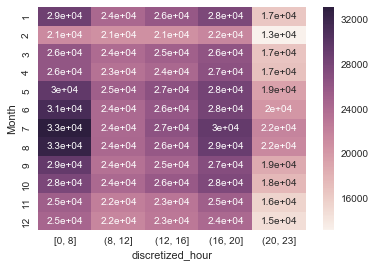

In [27]:
fig=sns.heatmap(gr.unstack(),annot=True)

In [28]:
gr= df5.groupby(['Month','discretized_hour'])['ID'].count()

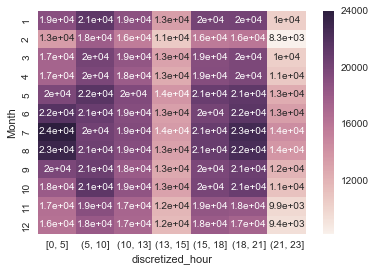

In [29]:
fig=sns.heatmap(gr.unstack(),annot=True)

In [30]:
df6.groupby(('Month','discretized_hour'))['ID'].size()

Month  discretized_hour
1      [0, 8]              28845
       (8, 12]             24454
       (12, 16]            26037
       (16, 20]            27802
       (20, 23]            16554
2      [0, 8]              21352
       (8, 12]             20809
       (12, 16]            20861
       (16, 20]            21723
       (20, 23]            13234
3      [0, 8]              26278
       (8, 12]             24091
       (12, 16]            25253
       (16, 20]            26497
       (20, 23]            16764
4      [0, 8]              26243
       (8, 12]             23434
       (12, 16]            24442
       (16, 20]            26770
       (20, 23]            17050
5      [0, 8]              29679
       (8, 12]             25298
       (12, 16]            26804
       (16, 20]            28399
       (20, 23]            19433
6      [0, 8]              31319
       (8, 12]             24352
       (12, 16]            26107
       (16, 20]            28320
       (20, 23]    

In [31]:
df5.groupby(('Month','discretized_hour'))['ID'].size()

Month  discretized_hour
1      [0, 5]              19061
       (5, 10]             21368
       (10, 13]            18947
       (13, 15]            13452
       (15, 18]            20162
       (18, 21]            20244
       (21, 23]            10458
2      [0, 5]              13487
       (5, 10]             17910
       (10, 13]            15647
       (13, 15]            10701
       (15, 18]            15855
       (18, 21]            16100
       (21, 23]             8279
3      [0, 5]              17414
       (5, 10]             20214
       (10, 13]            18533
       (13, 15]            13119
       (15, 18]            19302
       (18, 21]            19809
       (21, 23]            10492
4      [0, 5]              17449
       (5, 10]             19884
       (10, 13]            18059
       (13, 15]            12540
       (15, 18]            19314
       (18, 21]            19859
       (21, 23]            10834
5      [0, 5]              19842
       (5, 10]     

### The maximum crimes have occured at evening 7 pm and afternoon 12 pm

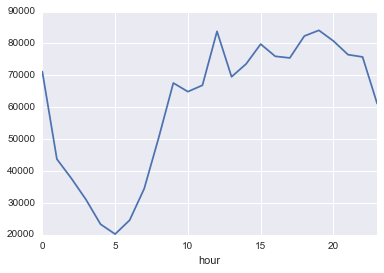

In [32]:
df.groupby('hour')['ID'].count().plot()

In [33]:
df.groupby('hour')['ID'].count().sort_values(ascending=False)

hour
19    84127
12    83802
18    82337
20    80776
15    79806
21    76496
16    75981
22    75781
17    75468
14    73585
0     71169
13    69554
9     67607
11    66896
10    64896
23    61183
8     50544
1     43734
2     37667
7     34487
3     31035
6     24593
4     23312
5     20219
Name: ID, dtype: int64

### Managerial Insights: There should be more patroling and police between midnight and morning 5 am and in the evenings from 6 to 9 pm 

### Most unsafe hours start in the evening 6 to 9 pm and from midnight and in the months May to August.

### Trends of crimes over the years

The crimes have decresed over the years from 2012. It was almost the same in 2015 and 2016. Very limited data is collected in 2017 hence the number is small. 

Using a countplot to count the crimes in each year.

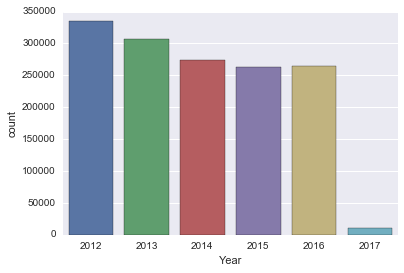

In [34]:
sns.countplot('Year', data=df)

In [35]:
df.groupby('Year')['ID'].count()

Year
2012    335328
2013    306636
2014    274345
2015    262738
2016    264679
2017     11329
Name: ID, dtype: int64

### Top 5 types of crime

Creating a new dataframe crime_count to display types of crimes and their count.Arranged them in descending order.

In [36]:
crime_count = pd.DataFrame(df.groupby('Primary Type').size().sort_values(ascending=False).rename('Count').reset_index())

In [37]:
crime_count.head(5)

,Primary Type,Count
0,THEFT,328987
1,BATTERY,263699
2,CRIMINAL DAMAGE,155454
3,NARCOTICS,135239
4,ASSAULT,91289


A bar graph which shows the Types of crimes plotted against the number of times they have occured.

Theft has happened the most, followed by Battery and Criminal Damaage.

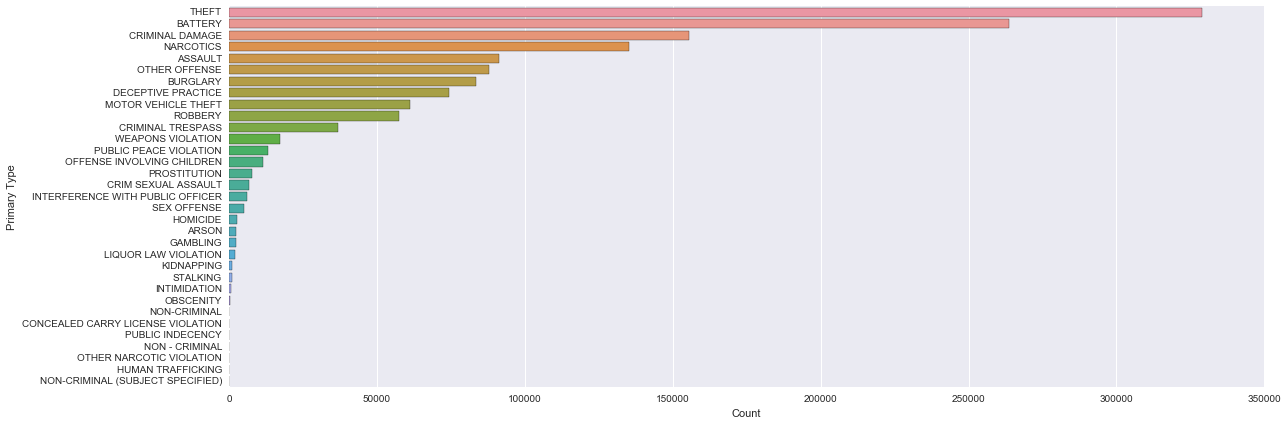

In [38]:
sns.factorplot(y='Primary Type', x='Count', data=crime_count, kind='bar',aspect=3,size=6)

To check the Domestic type of crimes:

In [39]:
mask=df.Domestic==1

In [40]:
df7=df[mask].groupby('Primary Type')['ID'].size().sort_values(ascending=False)

The top 5 types of domestic crimes

In [41]:
df7.head(5)

Primary Type
BATTERY            129130
OTHER OFFENSE       27776
ASSAULT             23099
CRIMINAL DAMAGE     15933
THEFT               10519
dtype: int64

This shows that the maximum domestic crimes in which arrest have happened in District 25.

In [42]:
df[mask].ix[df.Arrest==1,'District'].max()

25.0

### Which streets saw the highest crime activity?

Creating a new column which extracts on the second last words from the 'Block' column to get the street name.

In [43]:
df['Street']=df['Block'].str.split(" ").str[-2]

In [44]:
by_block=pd.DataFrame(df.groupby('Street').size().sort_values(ascending=False).rename('Count').reset_index())

In [45]:
by_block.head()

,Street,Count
0,STATE,24146
1,MICHIGAN,23675
2,HALSTED,17919
3,ASHLAND,17485
4,PARK,15285


# Machine Learning

#### I tried to regress 'Arrest' on other parameters to see if there is any relationship between 'Arrest' and other parameters.  

#### Running the regression as we can see that it gives out only one coefficient that is non zero i.e 'Beat', that too not very significant. 

In [46]:
df6.isnull().sum()

ID                      0
Date                    0
Block                   0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Year                    0
DateTime                0
hour                    0
Month                   0
discretized_hour        0
dtype: int64

In [47]:
dfm=df6

In [48]:
dfm=dfm.dropna(how='any')

In [49]:
dfm.isnull().sum()

ID                      0
Date                    0
Block                   0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Year                    0
DateTime                0
hour                    0
Month                   0
discretized_hour        0
dtype: int64

In [50]:
def getdow(dtm):
        return dtm.weekday()

In [51]:
dfm['DayofWeek']=dfm['DateTime'].apply(getdow)

In [52]:
dfm.columns

Index([u'ID', u'Date', u'Block', u'Primary Type', u'Location Description',
       u'Arrest', u'Domestic', u'Beat', u'District', u'Year', u'DateTime',
       u'hour', u'Month', u'discretized_hour', u'DayofWeek'],
      dtype='object')

In [53]:
dfm=dfm.drop(['Date','DateTime','Block','ID'],axis=1)

In [54]:
dfm = pd.get_dummies(data=dfm,columns=['Primary Type','Location Description'])

In [55]:
Y=dfm.Arrest

In [56]:
X = dfm.drop(['Arrest','discretized_hour'],axis=1)

In [57]:
from sklearn import linear_model
regLasso = linear_model.Lasso()

In [58]:
regLasso.fit(X,Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
d={X.columns[i] : regLasso.coef_[i] for i in range(0,len(X.columns)) }

In [60]:
s=pd.Series(d)

In [61]:
s[s!=0]

Beat   -0.000012
dtype: float64

# Clustering - Kmeans


#### Made 2 clusters to find some insights

In [62]:
df4.columns

Index([u'Unnamed: 0', u'ID', u'Case Number', u'Date', u'Block', u'IUCR',
       u'Primary Type', u'Description', u'Location Description', u'Arrest',
       u'Domestic', u'Beat', u'District', u'Ward', u'Community Area',
       u'FBI Code', u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On',
       u'Latitude', u'Longitude', u'Location'],
      dtype='object')

In [63]:
dfk=df4

In [64]:
dfk=dfk.dropna(how='any')

In [65]:
dfk=dfk.drop(['Block','FBI Code','Updated On','Description','Location','Unnamed: 0','Year' ,'Beat','Primary Type','ID', 'Case Number', 'Date',  'IUCR','Latitude', 'Longitude','Community Area','Ward'],axis=1)

In [66]:
dfk.columns

Index([u'Location Description', u'Arrest', u'Domestic', u'District',
       u'X Coordinate', u'Y Coordinate'],
      dtype='object')

#### Took a limited set of Locations where the count of crimes is high

In [67]:
x=pd.DataFrame(dfk.groupby('Location Description').size().sort_values(ascending=False).rename('Count').reset_index())

In [68]:
l1=pd.merge(dfk,x,how='inner',on='Location Description')

In [69]:
l1.dtypes

Location Description     object
Arrest                     bool
Domestic                   bool
District                float64
X Coordinate            float64
Y Coordinate            float64
Count                     int64
dtype: object

In [70]:
ab=l1.Count>=20000

In [71]:
dfk=l1[ab]

In [72]:
dfk.columns

Index([u'Location Description', u'Arrest', u'Domestic', u'District',
       u'X Coordinate', u'Y Coordinate', u'Count'],
      dtype='object')

In [73]:
dfk=pd.get_dummies(dfk,columns=['Arrest','Location Description'])

In [74]:
dfk.columns

Index([u'Domestic', u'District', u'X Coordinate', u'Y Coordinate', u'Count',
       u'Arrest_False', u'Arrest_True', u'Location Description_ALLEY',
       u'Location Description_APARTMENT',
       u'Location Description_DEPARTMENT STORE', u'Location Description_OTHER',
       u'Location Description_PARKING LOT/GARAGE(NON.RESID.)',
       u'Location Description_RESIDENCE',
       u'Location Description_RESIDENCE PORCH/HALLWAY',
       u'Location Description_RESIDENCE-GARAGE',
       u'Location Description_RESIDENTIAL YARD (FRONT/BACK)',
       u'Location Description_RESTAURANT',
       u'Location Description_SCHOOL, PUBLIC, BUILDING',
       u'Location Description_SIDEWALK',
       u'Location Description_SMALL RETAIL STORE',
       u'Location Description_STREET',
       u'Location Description_VEHICLE NON-COMMERCIAL'],
      dtype='object')

In [75]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=2, random_state=0)
clu.fit(dfk)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [76]:
dfk['cluster'] = clu.labels_

In [77]:
dfk.groupby('cluster').mean()

,Domestic,District,X Coordinate,Y Coordinate,Count,Arrest_False,Arrest_True,Location Description_ALLEY,Location Description_APARTMENT,Location Description_DEPARTMENT STORE,...,Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.210917,11.127352,1.164396e+06,1.883404e+06,240292,0.753777,0.246223,0.000000,0.202336,0.000000,...,0.252412,0.000000,0.000000,0.000000,0.000000,0.000000,0.178696,0.000000,0.366556,0.000000
1,0.060770,11.619611,1.164334e+06,1.888221e+06,32655,0.730536,0.269464,0.094859,0.000000,0.061824,...,0.000000,0.075917,0.076691,0.091731,0.076509,0.077353,0.000000,0.085658,0.000000,0.072865


Cluster 1 has:
1. Very less number of crimes compared to cluster 0
2. Less number of domestic crimes. Almost half of the domestic crimes than cluster 0.
3. Has no crimes taking place at residence
4. The arrest values are fairly similar.